In [1]:
from torchvision import transforms
import yaml
import torch
import numpy as np
from vae.bvae import BVAE
from collections import OrderedDict
from scipy.ndimage import zoom
#from vae.models import *


def forward_f_2(model_vae,f_2):
        #print(kwargs['labels'])
        #labels = kwargs['labels']
        f_3=model_vae.f3(f_2)
        f_4=model_vae.f4(f_3)
        #z2 = model.reparameterize(f_4, log_var)
        
        #print(self.decode(z).size())
        return  model_vae.decode(f_4)

In [3]:
##load vae models
with open('vae/bbvae_bvae.yaml', 'r') as file:
    config = yaml.safe_load(file)
#data = VAEDataset(**config["data_params"], pin_memory=len(config['trainer_params']['gpus']) != 0)
model_vae = BVAE(**config['model_params'])

state_dict_vae=torch.load('log\\bvae\\last.ckpt', map_location='cpu')
state_dict_vae=state_dict_vae['state_dict']

new_state_dict_vae=OrderedDict()
for k,v in state_dict_vae.items():
    name=k[6:]
    new_state_dict_vae[name]=v

model_vae.load_state_dict(new_state_dict_vae)
model_vae=model_vae.eval()

In [ ]:
att=np.zeros(29)
att[14]=1
att[20]=1
att[28]=1

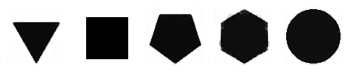

In [37]:
import matplotlib.pyplot as plt 
fig = plt.figure()
for i in range (0,5):
    att=np.zeros(29)
    att[14]=1
    att[20]=1
    att[28]=1
    att[i]=1
    f_2_tensor=torch.from_numpy(att).float()
    img=forward_f_2(model_vae,f_2_tensor).detach().numpy()[0,0,:,:]
    if i==1:
        img[14:72,14:72]=0
        img[0:14,:]=1
        img[:,0:14]=1
        img[72:80,:]=1
        img[:,72:80]=1
    ax = fig.add_subplot(1,5,i+1)
    ax.imshow(img,cmap='gray')
    plt.axis('off')

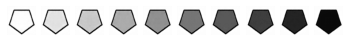

In [39]:
import matplotlib.pyplot as plt 
fig = plt.figure()
for i in range (0,10):
    att=np.zeros(29)
    att[2]=1
    att[5+i]=1
    att[20]=1
    att[28]=1
    f_2_tensor=torch.from_numpy(att).float()
    img=forward_f_2(model_vae,f_2_tensor).detach().numpy()[0,0,:,:]

    ax = fig.add_subplot(1,10,i+1)
    ax.imshow(img,cmap='gray')
    plt.axis('off')

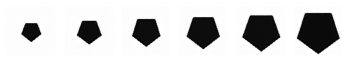

In [40]:
import matplotlib.pyplot as plt 
fig = plt.figure()
for i in range (0,6):
    att=np.zeros(29)
    att[2]=1
    att[14]=1
    att[15+i]=1
    att[28]=1
    f_2_tensor=torch.from_numpy(att).float()
    img=forward_f_2(model_vae,f_2_tensor).detach().numpy()[0,0,:,:]

    ax = fig.add_subplot(1,6,i+1)
    ax.imshow(img,cmap='gray')
    plt.axis('off')

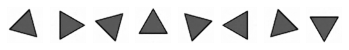

In [43]:
import matplotlib.pyplot as plt 
fig = plt.figure()
for i in range (0,8):
    att=np.zeros(29)
    att[0]=1
    att[11]=1
    att[20]=1
    att[21+i]=1
    f_2_tensor=torch.from_numpy(att).float()
    img=forward_f_2(model_vae,f_2_tensor).detach().numpy()[0,0,:,:]

    ax = fig.add_subplot(1,8,i+1)
    ax.imshow(img,cmap='gray')
    plt.axis('off')

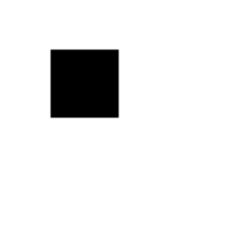

In [32]:
import matplotlib.pyplot as plt 
fig = plt.figure()
for i in [1]:
    att=np.zeros(29)
    att[14]=1
    att[20]=1
    att[28]=1
    att[i]=1
    f_2_tensor=torch.from_numpy(att).float()
    img=forward_f_2(model_vae,f_2_tensor).detach().numpy()[0,0,:,:]
    if i==1:
        img[16:41,16:41]=0
        img[0:16,:]=1
        img[:,0:16]=1
        img[41:80,:]=1
        img[:,41:80]=1
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    plt.axis('off')

In [29]:
img[img>0.3]=1

In [30]:
np.where(img!=1)

(array([14, 14, 14, ..., 76, 76, 76], dtype=int64),
 array([16, 17, 19, ..., 39, 40, 41], dtype=int64))